EDA

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter


Set the Directory Path and List Files

In [2]:
train_dir = '../input/facial-expression-datasets/train/train/'
# List the directories (emotion classes) present in the dataset
categories = os.listdir(train_dir)
print(f"Categories (emotion labels): {categories}")


Categories (emotion labels): ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


 Count the Number of Images in Each Category

In [3]:
category_counts = {category: len(os.listdir(os.path.join(train_dir, category))) for category in categories}
category_counts = pd.Series(category_counts).sort_values(ascending=False)
print(category_counts)


happy       7215
neutral     4965
sad         4830
fear        4097
angry       3995
surprise    3171
disgust      436
dtype: int64


 Display Some Sample Images from Each Category

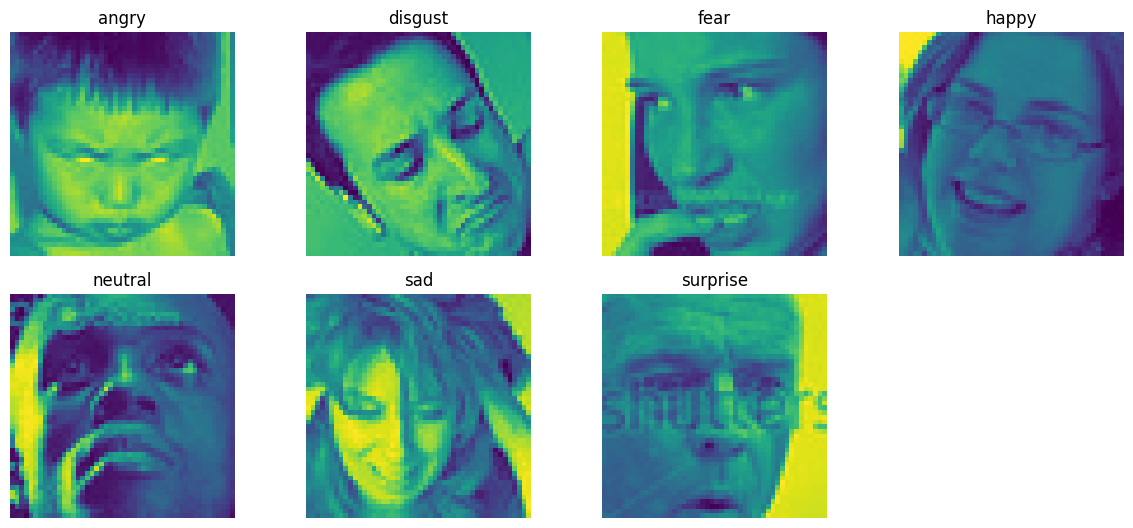

In [4]:
# Displaying a sample image from each category
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    img_path = os.path.join(train_dir, category, os.listdir(os.path.join(train_dir, category))[0])
    img = Image.open(img_path)
    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')
plt.tight_layout()
plt.show()


Image Dimensions and Data Types

In [5]:
# Checking dimensions of images in a random category
sample_category = categories[0]
sample_image_path = os.path.join(train_dir, sample_category, os.listdir(os.path.join(train_dir, sample_category))[0])
img = Image.open(sample_image_path)
print(f"Sample image size: {img.size}")  # width, height


Sample image size: (48, 48)


 Check for Image Corruption or Missing Files

In [6]:
def check_images_validity(category):
    invalid_images = []
    for img_name in os.listdir(os.path.join(train_dir, category)):
        try:
            img_path = os.path.join(train_dir, category, img_name)
            img = Image.open(img_path)
            img.verify()  # Verify image integrity
        except Exception as e:
            invalid_images.append(img_name)
    return invalid_images

# Check for invalid images in a category
invalid_images = check_images_validity(categories[0])
print(f"Invalid images in category {categories[0]}: {invalid_images}")


Invalid images in category angry: []


Create a DataFrame for Labels and Image Paths

In [7]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(train_dir, category)
    for img_name in os.listdir(category_path):
        image_paths.append(os.path.join(category_path, img_name))
        labels.append(category)

# Create a DataFrame
df = pd.DataFrame({'image_path': image_paths, 'label': labels})
df.head()


,image_path,label
0,../input/facial-expression-datasets/train/trai...,angry
1,../input/facial-expression-datasets/train/trai...,angry
2,../input/facial-expression-datasets/train/trai...,angry
3,../input/facial-expression-datasets/train/trai...,angry
4,../input/facial-expression-datasets/train/trai...,angry


Image Preprocessing and Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Pie Chart: Distribution of Emotion Categories

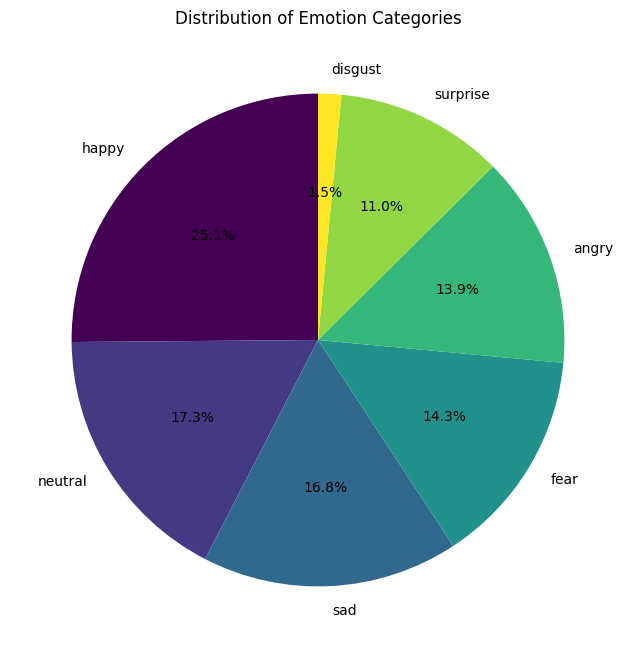

In [9]:
# Pie chart of category distribution
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', legend=False)
plt.title("Distribution of Emotion Categories")
plt.ylabel('')
plt.show()


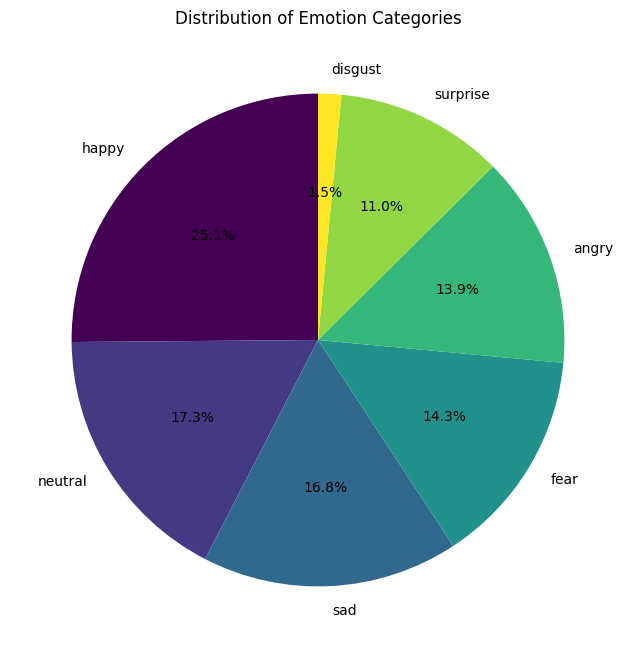

In [10]:
# Pie chart of category distribution
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', legend=False)
plt.title("Distribution of Emotion Categories")
plt.ylabel('')
plt.show()


 Bar Chart: Number of Images per Category

C:\Users\Ayesha Shabbir\AppData\Local\Temp\ipykernel_2336\835452122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


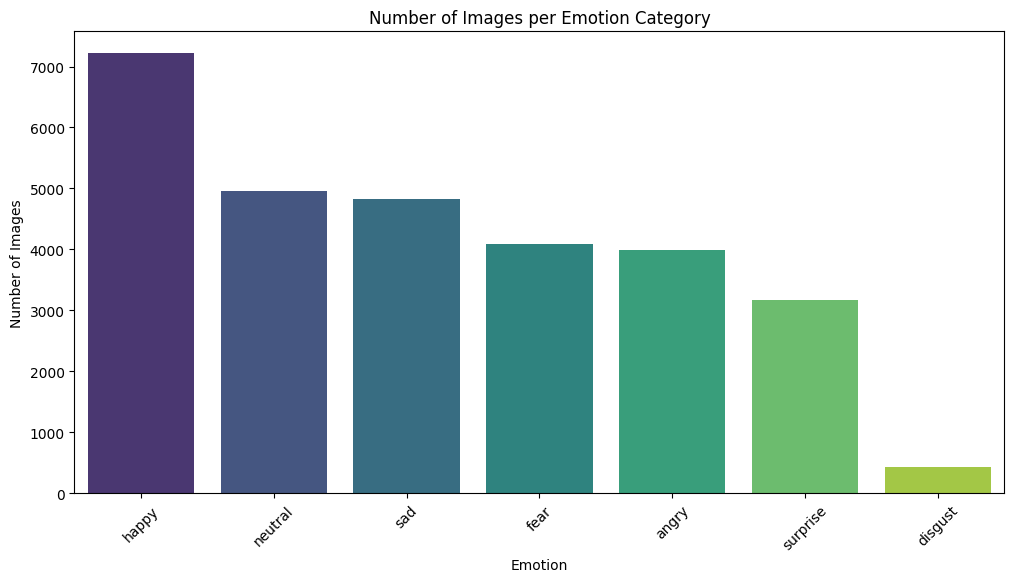

In [11]:
# Bar chart of category distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title("Number of Images per Emotion Category")
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


 Histogram: Image Size Distribution

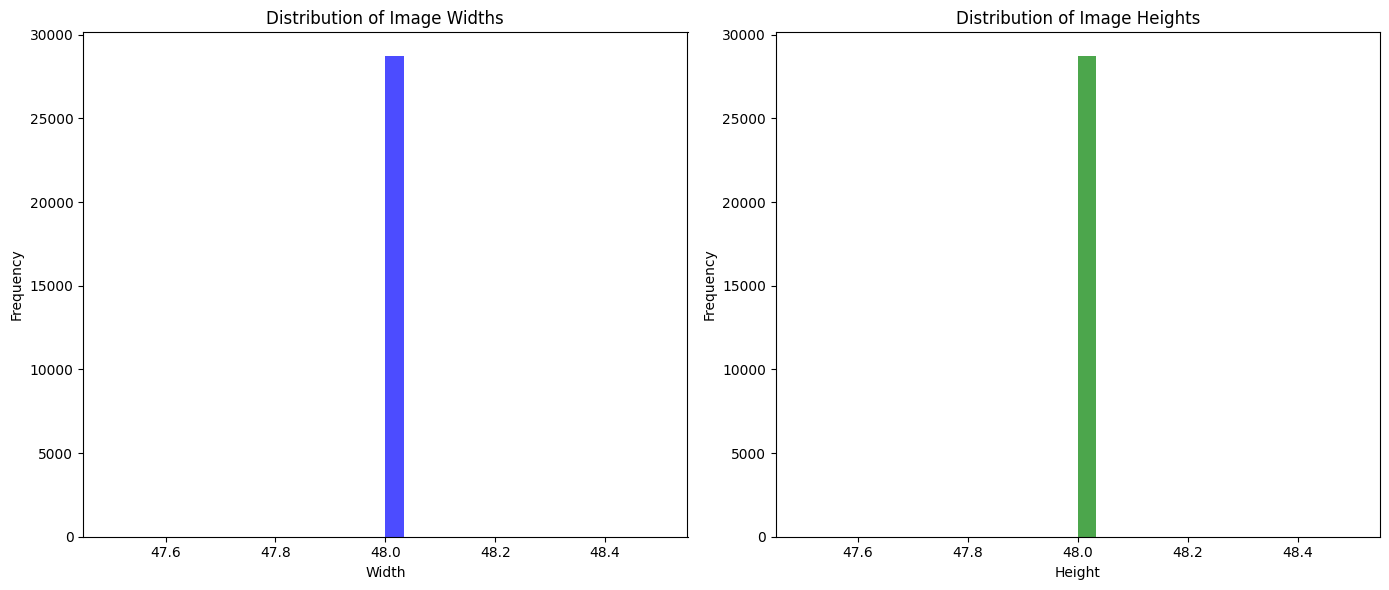

In [12]:
# Histogram of image sizes
image_widths = []
image_heights = []

# Collect width and height of all images in the dataset
for category in categories:
    category_path = os.path.join(train_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        image_widths.append(img.width)
        image_heights.append(img.height)

# Plot histograms
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Image Widths")
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=30, color='green', alpha=0.7)
plt.title("Distribution of Image Heights")
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Scatter plot of Image Width vs Image Height

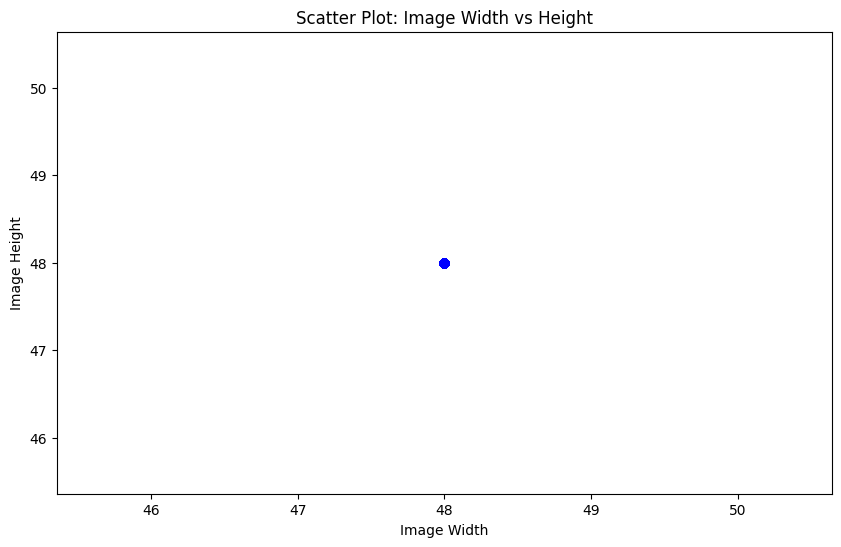

In [31]:
# Collect width and height of all images in the dataset
image_widths = []
image_heights = []
image_labels = []

# Collect the data for scatter plot
for category in categories:
    category_path = os.path.join(train_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)
        image_widths.append(img.width)
        image_heights.append(img.height)
        image_labels.append(category)

# Scatter plot of Image Width vs Image Height
plt.figure(figsize=(10, 6))
plt.scatter(image_widths, image_heights, c='blue', alpha=0.5)
plt.title("Scatter Plot: Image Width vs Height")
plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.show()
